In [1]:
import numpy
from matplotlib import pyplot
%matplotlib inline

In [2]:
#Set the font family and size to use for Matplotlib figures.
pyplot.rcParams['font.family'] = 'serif'
pyplot.rcParams['font.size']=16

In [3]:
#Set parameters.
Lx = 0.01 #length of the plate in the x-direction
Ly = 0.01 #height of the plate in the y-direciton
nx = 21 #number of points in the x-direction
ny = 21 #number of points in the y-direction
dx = Lx/(nx-1) #grid spacing in the x-direction
dy = Ly/(ny-1) #grid spacing in the y-direction
alpha = 1e-4 #thermal diffusivity of the plate

#Define the locations along a gridline.
x = numpy.linspace(0.0,Lx,num=nx)
y = numpy.linspace(0.0, Ly, num=ny)

#Compute the initial temperature distribution.
Tb = 100.0 #temperautre at the left and bottom boundaries
T0 = 20.0*numpy.ones((ny,nx))
T0[0,:] = Tb
T0[:,0] = Tb

In [4]:
def ftcs(T0, nt, dt, dx, dy, alpha):
    #Define some contraints
    sigma_x = alpha*dt/dx**2
    sigma_y = alpha*dt/dy**2
    #Integrate in time.
    T=T0.copy()
    ny,nx = T.shape
    I,J = int(nx/2), int(ny/2) #indices of the center
    for n in range (nt):
        T[1:-1,1:-1] = (T[1:-1, 1:-1]+sigma_x*(T[1:-1,2:]-2.0*T[1:-1, 1:-1]+T[1:-1, :-2])+
                                sigma_y*(T[2:, 1:-1]-2.0*T[1:-1, 1:-1]+T[:-2, 1:-1]))
        #Apply Neuman conditions (zero-gradient).
        T[-1, :] = T[-2,:] #Top boundary
        T[:,-1] = T[:,-2] #Right boundary     
        
        #Check if the center of the domain has reached T = 70C
        if T[J,I]>=70.0:
            break
    print('[time step {}] Center at T={:.2f} C at t={:.2f} s'.format(n+1, T[J,I], (n+1)*dt))
    return T

In [6]:
#Set the time-step size based on CFL limit.
sigma = 0.25
dt = sigma*min(dx,dy)**2/alpha #time-step size
nt = 500 #number of time steps to compute

#Compute the temperature along the rod.
T = ftcs(T0,nt,dt,dx,dy,alpha)


[time step 256] Center at T=70.02 C at t=0.16 s


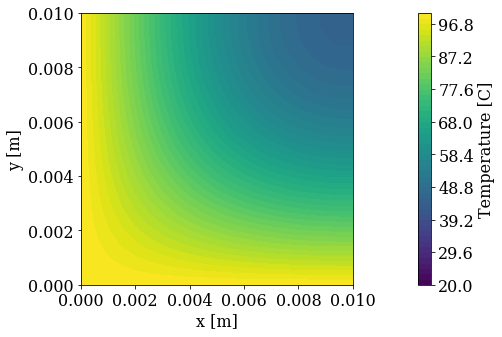

In [10]:
#Plot the filled contour of the temperature
pyplot.figure(figsize=(8.0,5.0))
pyplot.xlabel('x [m]')
pyplot.ylabel('y [m]')
levels = numpy.linspace(20.0, 100.0, num=51)
contf = pyplot.contourf(x,y,T,levels=levels)
cbar = pyplot.colorbar(contf)
cbar.set_label('Temperature [C]')
pyplot.axis('scaled', adjustable='box');